In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data = pd.read_csv(r"C:\Users\N V\Downloads\Automobile_data.csv", na_values= '?')

In [3]:
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
Data[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].replace('?', np.nan, inplace= True)

In [6]:
#data[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].dropna(axis = 0, how ='any', inplace=True)

In [7]:
data= Data.dropna()
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
data['engine-location'].unique()

array(['front'], dtype=object)

In [9]:
data['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [10]:
data['body-style'].value_counts()

sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: body-style, dtype: int64

# UNIVARIATE

## Normalized losses: Neumerical(discrete)

In [11]:
data['normalized-losses'].describe()

count    159.000000
mean     121.132075
std       35.651285
min       65.000000
25%       94.000000
50%      113.000000
75%      148.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [12]:
data['normalized-losses'].median()

113.0

Text(0.5, 1.0, 'normalized-losses')

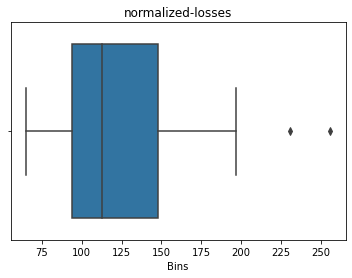

In [13]:
box_plot= sns.boxplot(data=data, x='normalized-losses')
box_plot.set_xlabel("Bins")
box_plot.set_title("normalized-losses")

## Make: categorical(nominal)

In [14]:
data['make'].mode()

0    toyota
dtype: object

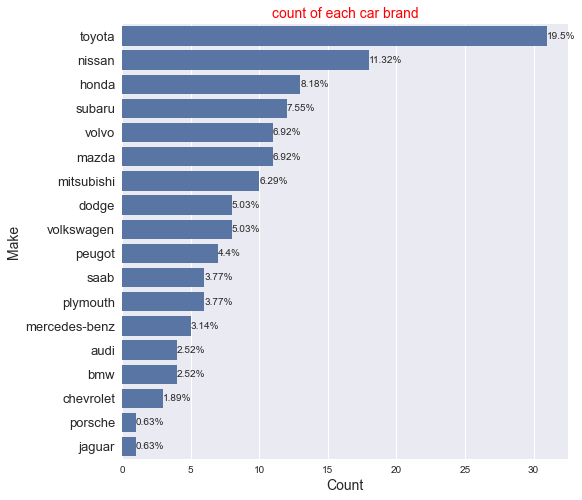

In [60]:
plt.figure(figsize=(8,8))
total = data['make'].shape[0]
color= sns.color_palette()[0]
values = data['make'].value_counts(ascending=False).values
sns.countplot(y= data['make'], color= color, order= data['make'].value_counts(ascending=False).index)
plt.xlabel("Count", fontsize= 14)
plt.ylabel("Make", fontsize= 14)
plt.yticks(fontsize= 13)
plt.title('count of each car brand',color='r',fontsize=14)
for y,x in enumerate(values):
    pct_string = f"{round((x/total)*100, 2)}%"
    plt.text(x, y, pct_string, va= 'center')

## Fuel-type: categorical(binary)

Text(0.5, 1.0, 'count of each fuel type')

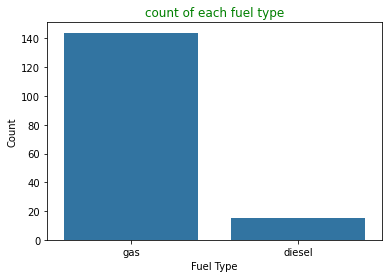

In [16]:
sns.countplot(x= data['fuel-type'], color=color)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title('count of each fuel type',color='g',fontsize=12)

## Body-style: categorical(nominal)

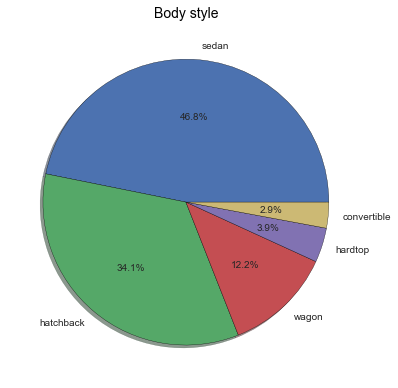

In [17]:
bins=[96,70,25,8,6]
label= ['sedan', 'hatchback','wagon', 'hardtop', 'convertible']
plt.style.use("seaborn")
plt.pie(bins, labels= label, wedgeprops={'edgecolor':'black'}, autopct= '%1.1f%%', shadow= True)
plt.title('Body style',color='black',fontsize=14)
plt.tight_layout()

## Drive-wheels: categorical(nominal)

Text(0.5, 1.0, 'count of each type of drive wheels')

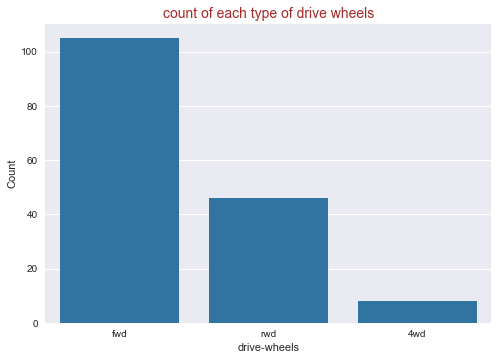

In [18]:
sns.countplot(x= data['drive-wheels'], color=color,order= data['drive-wheels'].value_counts(ascending=False).index)
plt.xlabel("drive-wheels")
plt.ylabel("Count")
plt.title('count of each type of drive wheels',color='brown',fontsize=14)

## Engine-location: categorical(binary)

Text(0.5, 1.0, 'Engine-location')

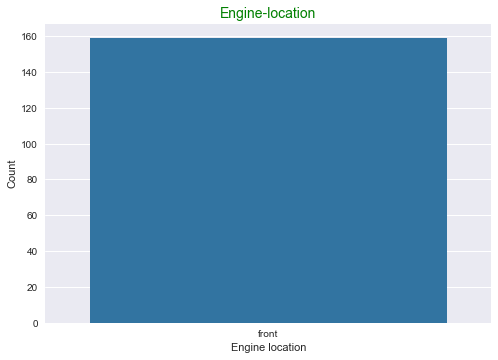

In [19]:
sns.countplot(x= data['engine-location'], color=color)
plt.xlabel("Engine location")
plt.ylabel("Count")
plt.title('Engine-location',color='g',fontsize=14)

In [20]:
data['engine-location'].value_counts()

front    159
Name: engine-location, dtype: int64

## Wheel-base: Neumerical(continous)

In [21]:
data['wheel-base'].describe()

count    159.000000
mean      98.264151
std        5.167416
min       86.600000
25%       94.500000
50%       96.900000
75%      100.800000
max      115.600000
Name: wheel-base, dtype: float64

<AxesSubplot:>

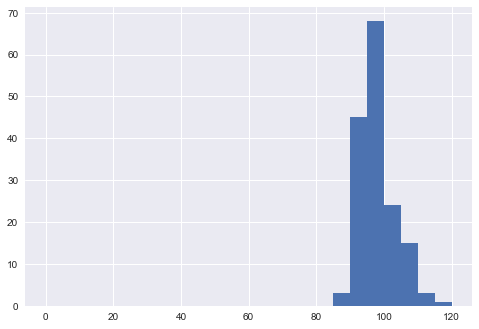

In [22]:
bins= np.arange(0,125,5 )
data['wheel-base'].hist(bins=bins)

## Length & Width & Height: Neumerical(continous)

Text(0.5, 0.98, 'Dimensions')

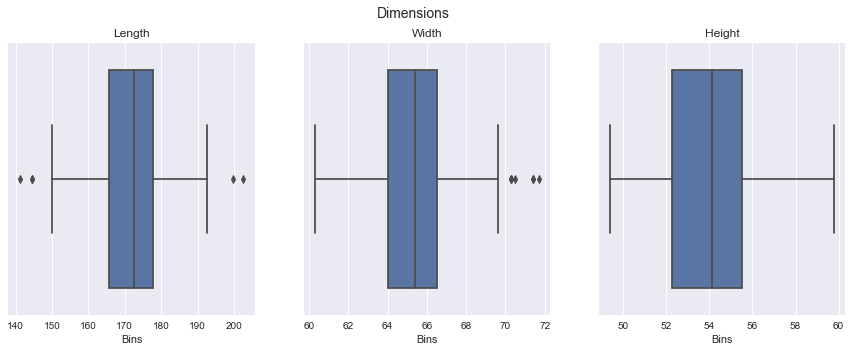

In [23]:
fig, axes = plt.subplots(1, 3, figsize= (15,5))
sns.boxplot(data= data, x= 'length', ax= axes[0])
axes[0].set_xlabel("Bins")
axes[0].set_title("Length")
sns.boxplot(data= data, x= 'width', ax= axes[1])
axes[1].set_xlabel("Bins")
axes[1].set_title("Width")
sns.boxplot(data= data, x= 'height', ax= axes[2])
axes[2].set_xlabel("Bins")
axes[2].set_title("Height")
plt.suptitle("Dimensions", fontsize= 14)

# BIVARIATE

# city-mpg & Highway mpg: Neumerical(discrete)

Text(0.5, 1.0, 'Highway mpg')

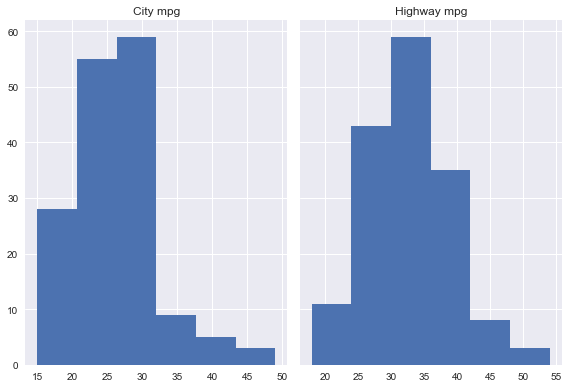

In [24]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(data['city-mpg'], bins = 6)
axs[1].hist(data['highway-mpg'], bins = 6)
axs[0].set_title("City mpg")
axs[1].set_title("Highway mpg")

## Horsepower & Price

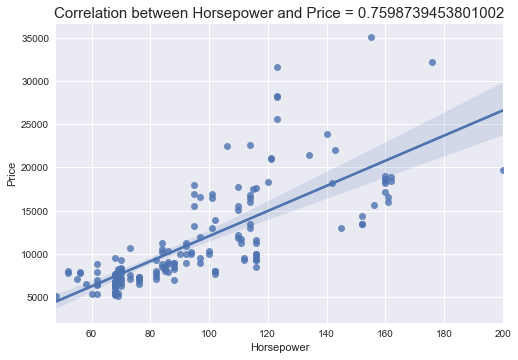

In [25]:
corr = data['horsepower'].corr(data['price'])
sns.regplot(x= data['horsepower'] , y= data['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Correlation between Horsepower and Price = {}'.format(corr), fontsize=15);

Text(0, 0.5, 'Price')

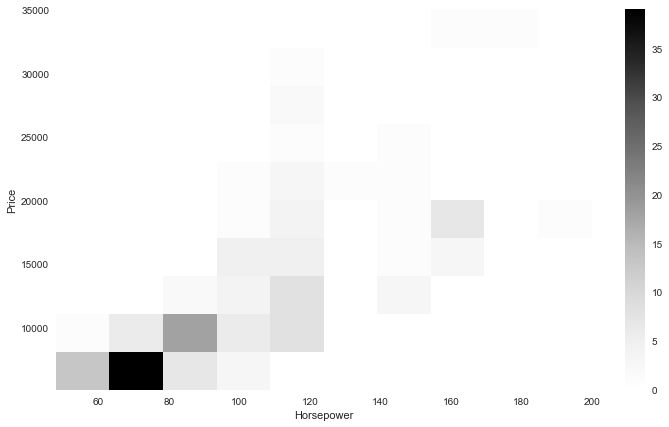

In [26]:
plt.figure(figsize= (12,7))
plt.hist2d(x= 'horsepower' , y= 'price', data= data)
plt.colorbar()
plt.xlabel('Horsepower')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

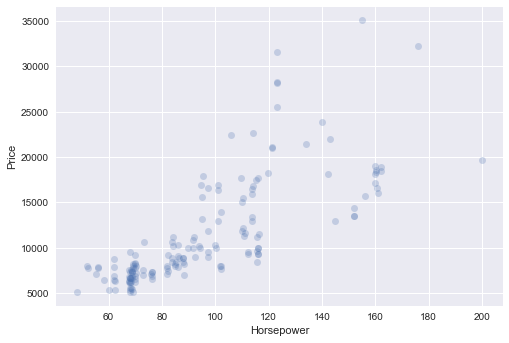

In [27]:
sns.regplot(x='horsepower', y='price', data= data, fit_reg= False, x_jitter= 0.3, scatter_kws= {'alpha':5/20})
plt.xlabel('Horsepower')
plt.ylabel('Price')

## Make & Price

Text(0.5, 1.0, 'Prices of each car brand')

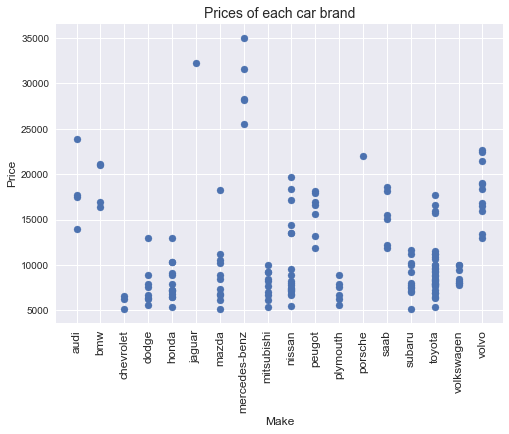

In [28]:
plt.scatter(data['make'],data['price'])
plt.xticks(rotation=90,fontsize= 12);
plt.xlabel('Make',fontsize= 12)
plt.ylabel('Price',fontsize= 12)
plt.title("Prices of each car brand",fontsize= 14)

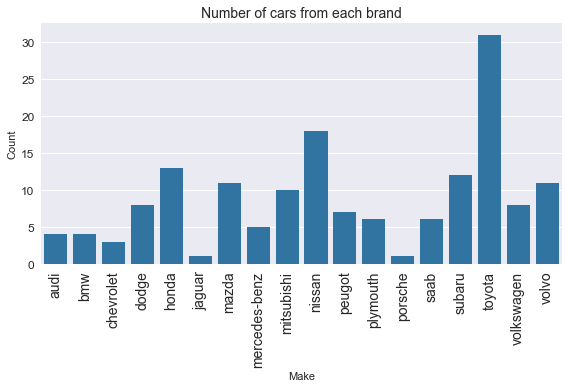

In [29]:
sns.countplot(x= data['make'], color= color)
plt.xlabel("Make")
plt.xticks(rotation= 90, fontsize= 14)
plt.ylabel("Count")
plt.yticks(fontsize= 12)
plt.title("Number of cars from each brand",fontsize= 14)
plt.tight_layout()

## Body style & Price

In [30]:
data['body-style'].value_counts()

sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: body-style, dtype: int64

<AxesSubplot:xlabel='body-style', ylabel='price'>

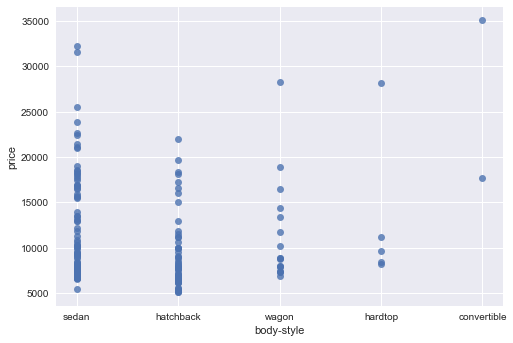

In [31]:
sns.regplot(x= data['body-style'], y= data['price'], fit_reg= False)

<AxesSubplot:xlabel='body-style', ylabel='price'>

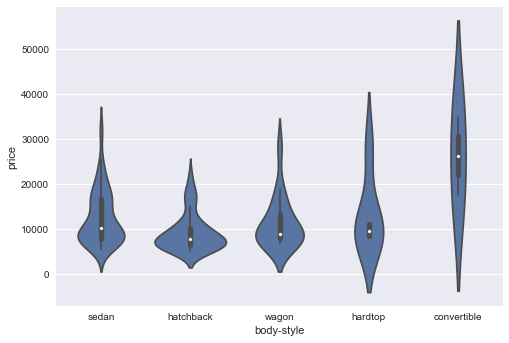

In [32]:
color= sns.color_palette()[0]
sns.violinplot(x= data['body-style'],y= data['price'], color= color)

# MULTIVARIATE

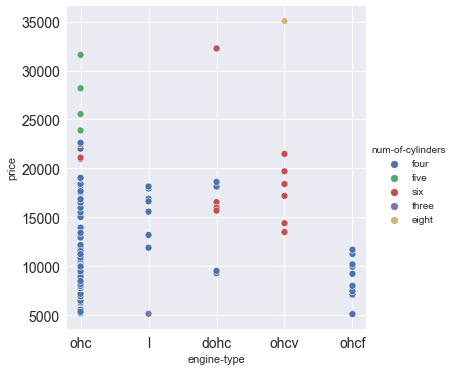

In [38]:
sns.relplot(x='engine-type', y='price', hue='num-of-cylinders', data=data);
plt.xticks(fontsize= 14);
plt.yticks(fontsize= 14);

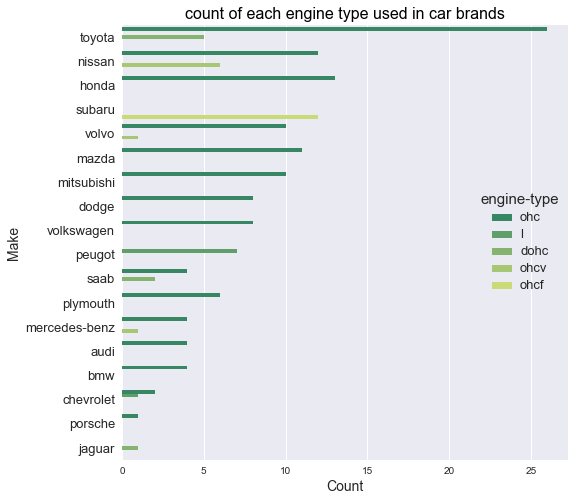

In [70]:
plt.figure(figsize=(8,8))
color= sns.color_palette()[0]
values = data['make'].value_counts(ascending=False).values
ax = sns.countplot(y= data['make'], color= color, hue=data["engine-type"], order= data['make'].value_counts(ascending=False).index, palette= 'summer')
plt.xlabel("Count", fontsize= 14)
plt.ylabel("Make", fontsize= 14)
plt.yticks(fontsize= 13)
plt.title('count of each engine type used in car brands',color='black',fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='13');
plt.setp(ax.get_legend().get_title(), fontsize='15');